<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Deutsch-Joza

In [1]:
# initialisation
import numpy as np
import math, cmath

# Importing standard Qiskit libraries
from qiskit.providers.aer import Aer, AerSimulator
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy, IBMQBackend
from qiskit.tools.jupyter import *

# basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import array_to_latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_34695/3406932148.py:17: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


# ORACULOS

Podemos crear una __funcion de oráculo__ para n qubits que sea balanceada o constante:

- balanceada: con una funcion de paridad o suma binaria
- constante: que devuelva siempre 0 o siempre 1

## Oráculo con funcion balanceada

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida como una suma binaria o funcion de paridad.

Ejecuta el circuito y construye el histograma de resultados

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


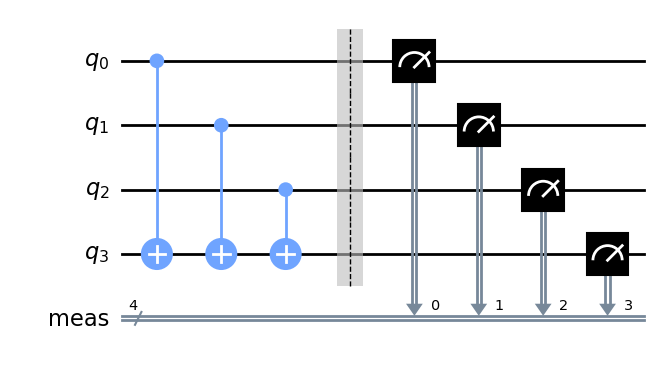

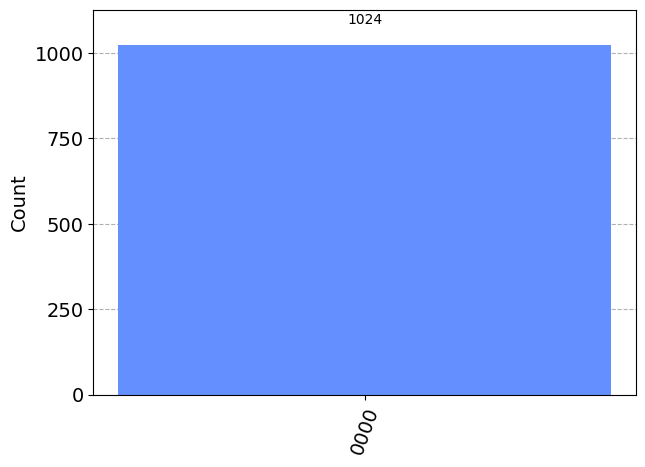

In [3]:
#BALANCEADA
#construimos un circuito de n+1 qubits con n bits de entrada y uno de salida que calcule la funcion paridad o suma binaria

n=3 #por ejemplo
#creamos el circuito
circuito = QuantumCircuit(n+1)
for ind in range(n):
    circuito.cx(ind,n)

#ponemos las puertas de medida
circuito.measure_all()

#lo dibujamos
display(circuito.draw("mpl"))

#Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuito,backend=backend)
job = backend.run(transpiled_circ).result()
plot_histogram(job.get_counts())

Si ponemos los n __qubits del input__ en superposicion vemos como es la funcion binaria balanceada. Estamos ejecutando todas los valores de input posibles a la vez.

#### EJERCICIO

Pon todos los n qubits de la entrada en superposicion y calcula la salida del ciruito.

Para ello ejecuta el circuito, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 1 ----- 136 ----- 0.1328125
010 ------ 1 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 1 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 1 ----- 142 ----- 0.138671875
shots totales 1024
```



/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


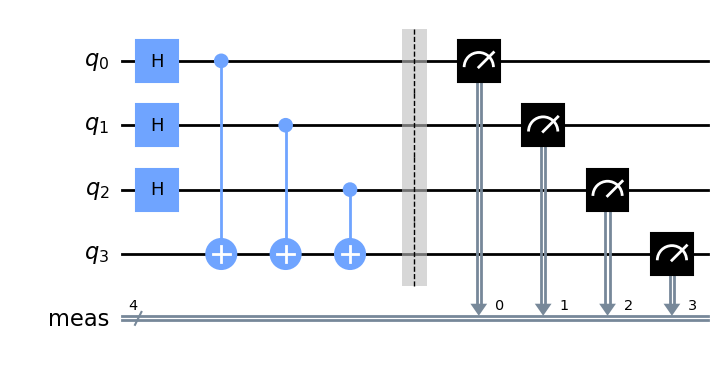

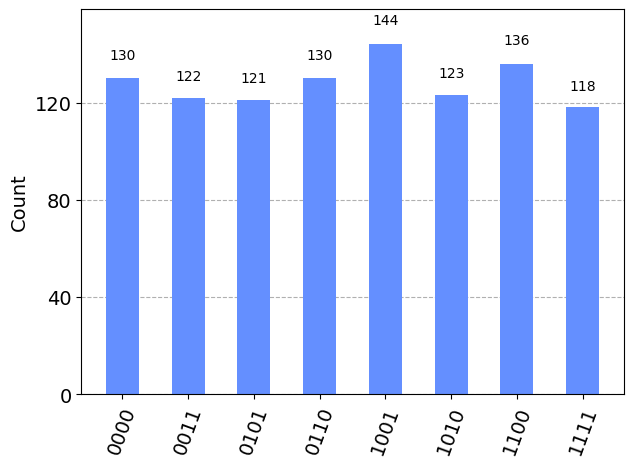

In [4]:
n=3
#creamos el circuito
circuito = QuantumCircuit(n+1)
for ind in range(n):
    circuito.h(ind)
for ind in range(n):
    circuito.cx(ind,n)

#ejecucion todas las entradas posibles de input en paralelo


#ponemos las puertas de medida
circuito.measure_all()

#lo dibujamos
display(circuito.draw("mpl"))


#Medimos que resultados da este circuito funcion
backend = Aer.get_backend("aer_simulator")
transpiled_circ = transpile(circuits=circuito,backend=backend)
job = backend.run(transpiled_circ).result()
plot_histogram(job.get_counts())


Veamoslo como valores de entrada y salida digitales

In [ ]:
#representacion de la salida en el formato especificado


## Oraculo con funcion constante

Creamos una funcion binaria constante. Vamos a seleccionar aleatoriamente si queremos que la salida sea siempre 0 o siempre 1

#### EJERCICIO

Construye un circuito con n qubits de entrada y 1 qubit de salida, que compute la salida constante como 0 ó 1.

Calcula un numero aleatorio y en funcion de este numero, decide si la salida será 0 ó 1

Ejecuta el circuito poniendo todos los qubits de entrada en superposicion, obten el histograma y muestra el resultado de las medidas obtendas con el siguiente formato:

```
INPUT------OUTPUT-----count----percent
000 ------ 0 ----- 106 ----- 0.103515625
001 ------ 0 ----- 136 ----- 0.1328125
010 ------ 0 ----- 135 ----- 0.1318359375
011 ------ 0 ----- 141 ----- 0.1376953125
100 ------ 0 ----- 104 ----- 0.1015625
101 ------ 0 ----- 125 ----- 0.1220703125
110 ------ 0 ----- 135 ----- 0.1318359375
111 ------ 0 ----- 142 ----- 0.138671875
shots totales 1024
```

In [ ]:
n=3
#creamos el circuito


#ejecucion todas las entradas posibles de input en paralelo


#codificamos todo 1's o todo 0's a la salida de forma aleatoria


#ponemos las puertas de medida


#lo dibujamos



#Medimos que resultados da este circuito funcion


#mostramos histograma resultado


#mostramos la ejecucion de la funcion en binario


## Oraculo con funcion aleatoria

Con todo el codigo anterior definimos una funcion que de forma aleatoria va a decidir como crea el oraculo, si balanceado o constante (con 0's o 1's)

### EJERCICIO

Crea una funcion una funcion de oráculo que devuelva un circuito que computa una funcion constante o balanceada de forma aleatoria

In [ ]:
def dj_oracle(n):
    #La funcion crea un objeto de QuantumCircuit y lo devuelve
    #El circuito del oraculo tiene n qubit de entrada y uno de salida -> en total n+1 qubits

     oracle_qc = 

    #sorteamos el tipo de funcion del oraculo 0=constante y 1=balanceada


    #Caso de un oraculo constante


    #Caso de un oraculo balanceado


    oracle_qc.name = 'DJ-Oracle' 
    return oracle_qc

Lo ejecutamos en superposicion para ver la salida de la funcion del oráculo

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit = 

#ponemos los qubits de entrada en superposicion

# Le añadimos el oráculo con funcion aleatoria  -> Utilizar el metodo.compose de la clase QuantumCircuit


#ponemos las puertas de medida


#Mostramos el circuito


#lo ejecutamos


#mostramos histograma resultado


#mostramos la ejecucion de la funcion en binario



# Ejecucion del Algoritmo de Deusch-Jozsa

## Ejecucion Paso a Paso en el simulador

Vamos a hacer una ejecucion paso a paso viendo el vector de estados. Para ello vamos definir una funcion que nos ayudará a visualizar el vector de estados paso a paso

### EJERCICIO

Construye una funcion que tome como entrada un ciruito cuantico, lo ejecute, obtenga el vector de estados resultado y muestre por pantalla su valor en formato latex, las probabilidades y las fases de cada componente del vector

In [ ]:
def svector_viz(qc):
    #tomamos un circuito sin medidas
    #medimos el estado, hay que salvar el vector de estados del circuito (en lugar de poner puertas de medida)
    
    #ejecutamos en el simulador
    
    #obtenemos el vector de estados resultado
    
    #imprimimos el vector en latex
    
    #imprimimos las probabilidades de cada estado de la base
    
    #imprimimos las pases de cada estado de la base
    
    #visualizamos el plot_bloch_multivector


Ejecutamos paso a paso el algoritmo, que no es más que poner en superposicion los estados de los qubits del registro de entrada y de salida:

- en el registro de entrada, todos los qubits deben de estar en el estado |+>
- en el registro de salida el qubit debe de estar en el estado |->

El oraculo es aleatorio y el algoritmo nos dira en una sola ejecucion si la funcion es constante cuando el registro de entrada quede en estado |00...0>. En caso contrario la funcion es balanceada

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit = 

#PASO 1 - ponemos los qubits de entrada en superposicion


#ponemos el qubit de salida

#descomentar para mostrar el circuito y vector de estados en este paso
#display(circuit.draw())
#svector_viz(circuit)

# PASO 2- Le añadimos el oráculo con funcion aleatoria



#PASO 3 - Le añadimos las puertas Hadamard


#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada


#PASO 5- Medimos resultados finales


#mostramos histograma resultado



# Ejecucion en un Simulador con ruido

### EJERCICIO

Ejecuta en un simulador con ruido el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Preparamos un simulador con el ruido de un dispositivo real, el `ibmq_vigo`.
- Transpilamos el circuito y lo ejecutamos en el simulador

In [ ]:
#Creamos un circuito de n qubits+1
n=3
circuit = 

#PASO 1 - ponemos los qubits de entrada en superposicion


#ponemos el qubit de salida


# PASO 2- Le añadimos el oráculo con funcion aleatoria


#PASO 3 - Le añadimos las puertas Hadamard



#PASO 4- ponemos las puertas de medida solo para los qubits de la entrada



#Mostramos el circuito


In [ ]:
from qiskit.providers.fake_provider import FakeVigo

# Tomamos un backend ruidoso ficticio de fake providers


# creamos el simulador


# Transpilamos el circuito para mapearlo a las puertas ruidosass


# Ejecutamos el circuito y obtenemos el resultado


# Ejecucion en un BackEnd cuántico real

### EJERCICIO

Ejecuta en un backend real cuantico el circuito con el algoritmo de Detsch-Joza, para ello:

- Creamos el circuito cuántico, que llamamos <b>dj_circuit </b>
- Lo ejecutamos primero en el simulador para ver si funciona bien antes de enviarlo a un BackEnd cuántico real
- Buscamos el backend que este menos cargado de trabajos
- Transpilamos el circuito y lo enviamos para ejecucion

In [ ]:
#Construimos el circuito

#ejecutamos en simulador para comprobar que esta ok


In [ ]:
# buscamos el backend menos ocupado - using a real qc backend: lest busy



In [ ]:
#lanzamos la ejecucion del job


Y cuando termine la ejecucion, consultaremos el resultado